# New Experiments using the Lower / upper bounds

What kind of question would we like to answer ... 

 - What is the maximum and minimum error we get from the first lower bound compared with the final latency ?

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
toIntList = lambda x: [int(y) for y in x.strip("[]").split(",")]
df = pd.read_csv("automotive.test.log", sep=";",
                 converters={
                     "ExpansionVertex": toIntList,
                     "ExpansionEdges": toIntList,
                     "LowerBounds": toIntList,
                     "UpperBounds": toIntList,
                 }
                )


df.LowerBounds = df.apply(lambda x :  [y/x.AgeLatency for y in x.LowerBounds]  , axis = 1)
df.UpperBounds = df.apply(lambda x :  [y/x.AgeLatency for y in x.UpperBounds]  , axis = 1)
df.ExpansionVertex = df.apply(lambda x :  [y/(x.sum_n+2) for y in x.ExpansionVertex]  , axis = 1)

assert(df.ExpansionVertex.apply(max).max())
assert(df.LowerBounds.apply(max).max())
assert(df.UpperBounds.apply(max).max())

df["BoundsDistances"] = df.apply(lambda x : [abs( l - r ) for (l,r) in zip(x.LowerBounds,x.UpperBounds)], axis=1)

##  What is the maximum and minimum error we get from the first lower bound compared with the final latency ?

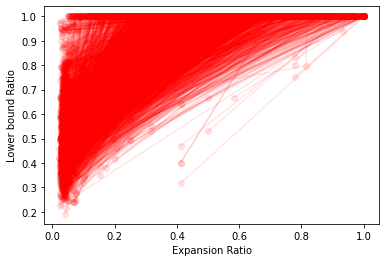

In [131]:
import matplotlib.pyplot as plt

for (x,y) in list(df.apply(lambda x :  (x.ExpansionVertex, x.LowerBounds)  , axis = 1)) :
    plt.plot(x,y, marker="o", color = "r", alpha = 0.1)
_ = plt.xlabel("Expansion Ratio")
_ = plt.ylabel("Lower bound Ratio")

In [132]:
print(df.columns)
print(df.IterationCount.max())

Index(['kind', 'n', 'm', 'sum_n', 'AgeLatency', 'IterationCount',
       'ExpansionVertex', 'ExpansionEdges', 'LowerBounds', 'UpperBounds',
       'gen_time', 'sp_time', 'BoundsDistances'],
      dtype='object')
12


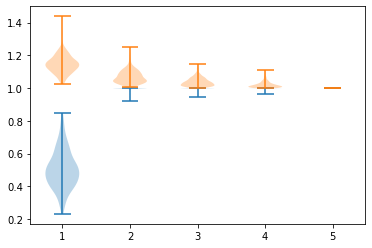

In [133]:
def plotBoundsByIteration(df, itercount) :
    sdf  =  df[df.IterationCount == itercount]
    _ = plt.violinplot(pd.DataFrame(sdf.LowerBounds.to_list(), columns=range(itercount)))
    _ = plt.violinplot(pd.DataFrame(sdf.UpperBounds.to_list(), columns=range(itercount)))
    
plotBoundsByIteration(df, 5)

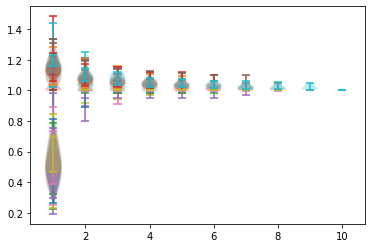

In [149]:
for it in range(1,df.IterationCount.max() + 1) :
    if len(df[df.IterationCount == it]) > 1:
        plotBoundsByIteration(df, it)

In [135]:
def plotBounds(df) :
    sdf = df.copy()
    sdf.LowerBounds = sdf.apply (lambda x : x.LowerBounds + (df.IterationCount.max() - x.IterationCount)*x.LowerBounds[-1:], axis = 1)
    sdf.UpperBounds = sdf.apply (lambda x : x.UpperBounds + (df.IterationCount.max() - x.IterationCount)*x.UpperBounds[-1:], axis = 1)
    _ = plt.violinplot(pd.DataFrame(sdf.LowerBounds.to_list(), columns=range(df.IterationCount.max())))
    _ = plt.violinplot(pd.DataFrame(sdf.UpperBounds.to_list(), columns=range(df.IterationCount.max())))

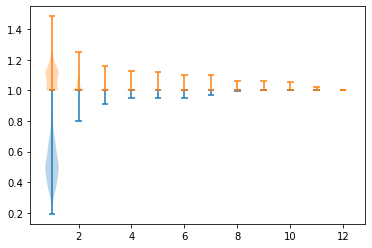

In [136]:
plotBounds(df) 

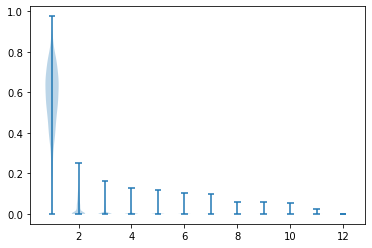

In [137]:
def plotBoundsDistances(df) :
    sdf = df.copy()
    sdf.BoundsDistances = sdf.apply (lambda x : x.BoundsDistances + (df.IterationCount.max() - x.IterationCount)*x.BoundsDistances[-1:], axis = 1)
    _ = plt.violinplot(pd.DataFrame(sdf.BoundsDistances.to_list(), columns=range(df.IterationCount.max())))
plotBoundsDistances(df)

<AxesSubplot:>

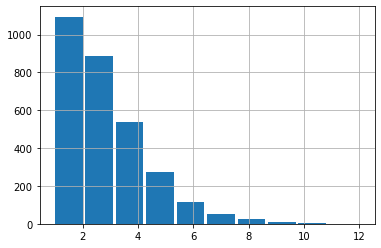

In [150]:
df.IterationCount.hist(width=1)

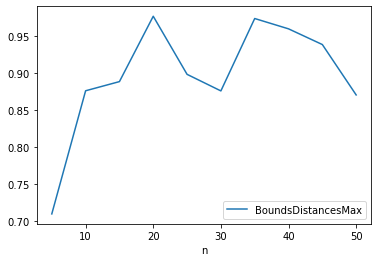

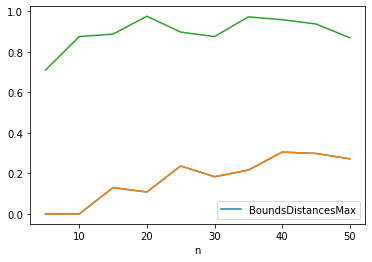

In [171]:
sdf = df.copy()
sdf.BoundsDistances = sdf.apply (lambda x : x.BoundsDistances + (df.IterationCount.max() - x.IterationCount)*x.BoundsDistances[-1:], axis = 1)
sdf["BoundsDistancesMax"] = sdf.BoundsDistances.apply(lambda x : max(x))
sdf.groupby("n").max().reset_index()[["n","BoundsDistancesMax"]].plot(x="n", y="BoundsDistancesMax")
sdf.groupby("n").min().reset_index()[["n","BoundsDistancesMax"]].plot(x="n", y="BoundsDistancesMax")

x = sdf.groupby("n").max().reset_index()["n"]
y1 = sdf.groupby("n").min().reset_index()["BoundsDistancesMax"]
y2 = sdf.groupby("n").max().reset_index()["BoundsDistancesMax"]

plt.plot(x,y1)
plt.plot(x,y2)